import dependencies

In [2]:
import pywt

import cv2

In [5]:
import tensorflow as tf

In [6]:
import os

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix

In [7]:
gpus=tf.config.list_physical_devices("GPU")

In [8]:
for gpu in gpus:
    tf.config.experimental.set_memory_growth(GPU,True)

In [9]:
len(gpus)

0

In [17]:
camera = cv2.VideoCapture(0)
# Set the directory where you want to save the images
output_directory = "output_data/"
# Capture and save a specified number of images (e.g., 10)
for i in range(100):
    ret, frame = camera.read()  # Read a frame from the webcam
    if ret:
        image_filename = f"webcam_image_{i}.jpg"
        full_path=os.path.join("output_data",image_filename)
        cv2.imwrite(full_path, frame) # Save the frame as a JPG file
        print(f"Saved {image_filename}")
    else:
        print("Error capturing image from webcam.")

# Release the webcam
camera.release()
cv2.destroyAllWindows()

Saved webcam_image_0.jpg
Saved webcam_image_1.jpg
Saved webcam_image_2.jpg
Saved webcam_image_3.jpg
Saved webcam_image_4.jpg
Saved webcam_image_5.jpg
Saved webcam_image_6.jpg
Saved webcam_image_7.jpg
Saved webcam_image_8.jpg
Saved webcam_image_9.jpg
Saved webcam_image_10.jpg
Saved webcam_image_11.jpg
Saved webcam_image_12.jpg
Saved webcam_image_13.jpg
Saved webcam_image_14.jpg
Saved webcam_image_15.jpg
Saved webcam_image_16.jpg
Saved webcam_image_17.jpg
Saved webcam_image_18.jpg
Saved webcam_image_19.jpg
Saved webcam_image_20.jpg
Saved webcam_image_21.jpg
Saved webcam_image_22.jpg
Saved webcam_image_23.jpg
Saved webcam_image_24.jpg
Saved webcam_image_25.jpg
Saved webcam_image_26.jpg
Saved webcam_image_27.jpg
Saved webcam_image_28.jpg
Saved webcam_image_29.jpg
Saved webcam_image_30.jpg
Saved webcam_image_31.jpg
Saved webcam_image_32.jpg
Saved webcam_image_33.jpg
Saved webcam_image_34.jpg
Saved webcam_image_35.jpg
Saved webcam_image_36.jpg
Saved webcam_image_37.jpg
Saved webcam_image_38.

In [10]:
def image_to_grey_scale(path):
    if os.path.isfile(path):
        image=cv2.imread(path)
        img_rgb1=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        img_gray=cv2.cvtColor(img_rgb1,cv2.COLOR_RGB2GRAY)
        #print("read successfully")
        return img_gray,img_rgb1
    else:
        print("file path is not exist")

In [12]:
def finding_face_and_eyes(path,i_class,image):
    img_gr,img_color=image_to_grey_scale(path)
    
    eye_cascade=cv2.CascadeClassifier("./haar-cascade-files-master/haar-cascade-files-master/haarcascade_eye.xml")
    face_cascade=cv2.CascadeClassifier("./haar-cascade-files-master/haar-cascade-files-master/haarcascade_frontalface_default.xml")
    face = face_cascade.detectMultiScale(img_gr, scaleFactor=1.1, minNeighbors=5)
    for i,(x, y, w, h) in enumerate(face):
        roi=img_gr[y:y+h, x:x+w]
        roi_color=img_color[y:y+h,x:x+h]
        eye = eye_cascade.detectMultiScale(roi, scaleFactor=1.1, minNeighbors=5)
        if len(eye) == 2:
            path1 = os.path.join("cropped_images_face",i_class)
            if os.path.exists(path1):
                #print("path exists")
                output_path = os.path.join("cropped_images_face",i_class,f"{i}{image}")
                cv2.imwrite(output_path, roi_color)
            else:
                if os.path.exists("./cropped_images_face"):
                    os.makedirs(os.path.join("cropped_images_face",i_class))
                    #print("created",i_class)
                    output_path = os.path.join("cropped_images_face",i_class,f"{i}{image}")
                    cv2.imwrite(output_path, roi_color)
                else:
                    os.makedirs("cropped_images_face")
                    #print("directory created")
                    os.makedirs(os.path.join("cropped_images_face",i_class))
                    #print("created",i_class)
                    output_path = os.path.join("cropped_images_face",i_class,f"{i}{image}")
                    cv2.imwrite(output_path, roi_color)

In [8]:
for i_class in os.listdir("./output_data"):
    for image in os.listdir(os.path.join("output_data",i_class)):
        finding_face_and_eyes(os.path.join("output_data",i_class,image),i_class, image)

directory created
created one


In [9]:
class_face_dict={}

In [10]:
image_path=[]

image_path1=[]


for image in os.listdir(os.path.join("cropped_images_face","zero")):
    image_path.append(os.path.join("cropped_images_face","zero",image))

for image in os.listdir(os.path.join("cropped_images_face","one")):
    image_path1.append(os.path.join("cropped_images_face","one",image))



class_face_dict["zero"]=image_path

class_face_dict["one"]=image_path1


#class_face_dict

In [11]:
dict={}
count=0
for name in class_face_dict.keys():
    dict[name]=count
    count+=1
#dict

In [39]:
def w2d1(img,mode="haar",level=1):
    imarray=img
    #imarray=cv2.cvtColor(imarray,cv2.COLOR_BGR2GRAY)
    imarray=np.float32(imarray)
    imarray/=255
    co=pywt.wavedec2(imarray,mode,level)
    co_h=list(co)
    co_h[0]*=0
    imarray_h=pywt.waverec2(co_h,mode)
    imarray_h*=255
    imarray_h=np.uint8(imarray_h)
    return imarray_h

In [38]:
x=[]
y=[]
combined_image=[]
for name , paths in class_face_dict.items():
    for path in paths:
        img = cv2.imread(path)
        img_sca=cv2.resize(img,(256,256))
        img_sca=cv2.cvtColor(img_sca,cv2.COLOR_RGB2GRAY)
        #print(img_sca.size)
        imhar=w2d1(img,'db1',5)
        #print(imhar.size)
        img_ha=cv2.resize(imhar,(256,256))
        #img_sha=cv2.cvtColor(img_ha,cv2.COLOR_RGB2GRAY)
        #print(img_sha.size)
        combined_image=np.hstack((img_ha.reshape(256,256,1),img_sca.reshape(256,256,1)))
        x.append(combined_image)
        y.append(dict[name])
"""len(x[0])
plt.imshow(x[100],cmap="gray")
len(y)"""

NameError: name 'class_face_dict' is not defined

In [15]:
x= np.array(x).reshape(len(x),256,512,1).astype("float32")

In [16]:
x_norm= x/255.0

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x_norm,y,test_size=0.2,random_state=42)

In [18]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),1,activation="relu",input_shape=(256,512,1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32,(3,3),1,activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16,(3,3),1,activation="relu"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(2,activation="softmax")
])
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

C:\Users\Tejasri Seeripi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
history=model.fit(np.array(x_train),np.array(y_train),epochs=20,verbose=0)

C:\Users\Tejasri Seeripi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend\tensorflow\nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


In [20]:
model.evaluate(np.array(x_test),np.array(y_test))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 1.0000 - loss: 3.7047e-04


[0.0003704650152940303, 1.0]

Text(0, 0.5, 'loss')

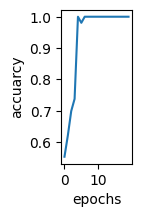

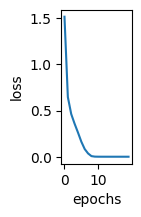

In [21]:
plt.figure(figsize=(2,2))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"])
plt.xlabel("epochs")
plt.ylabel("accuarcy")

plt.figure(figsize=(2,2))
plt.subplot(1,2,2)
plt.plot(history.history["loss"])
plt.xlabel("epochs")
plt.ylabel("loss")

In [22]:
y_pred=model.predict(np.array(x_test))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


In [59]:
len(y_pred)

26

In [23]:
"""
plt.figure(figsize=(10,20))
for i in range(10):
    plt.subplot(13,2,i+1)
    plt.imshow(np.array(x_test[i]),cmap="gray")
    plt.xlabel(f"TRUE{np.array(y_test[i])}")
    plt.ylabel(f"predicted{np.argmax(y_pred[i])}")
    """

'\nplt.figure(figsize=(10,20))\nfor i in range(10):\n    plt.subplot(13,2,i+1)\n    plt.imshow(np.array(x_test[i]),cmap="gray")\n    plt.xlabel(f"TRUE{np.array(y_test[i])}")\n    plt.ylabel(f"predicted{np.argmax(y_pred[i])}")\n    '

In [24]:
y_pred_max=[]

In [25]:
for i in range(26):
    y_pred_max.append(np.argmax(y_pred[i]))

In [26]:
len(y_pred_max)

26

In [27]:
cns1=confusion_matrix(np.array(y_test),y_pred_max)

<Axes: >

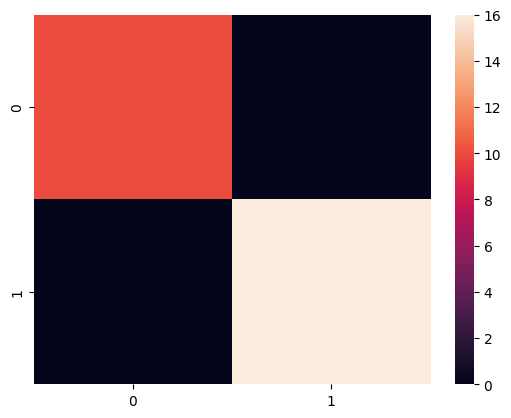

In [28]:
sns.heatmap(cns1)

In [ ]:
model.save("./models/face_recognization.keras")

In [51]:
def capture():
    camera = cv2.VideoCapture(0)
    
    # Set the directory where you want to save the images
    output_directory = "output_data1/"
    
    # Capture and save a specified number of images (e.g., 10)
    for i in range(1):
        ret, frame = camera.read()  # Read a frame from the webcam
        if ret:
            image_filename = f"webcam_image_{i}.jpg"
            full_path=os.path.join("output_data1",image_filename)
            cv2.imwrite(full_path, frame) # Save the frame as a JPG file
            print(f"Saved {image_filename}")
        else:
            print("Error capturing image from webcam.")
    
    # Release the webcam
    camera.release()
    cv2.destroyAllWindows()
    path = os.path.join("./output_data1",image_filename)
    
    face_cascade=cv2.CascadeClassifier("./haar-cascade-files-master/haar-cascade-files-master/haarcascade_frontalface_default.xml")
    
    
    combined_image1=[]
    x_1=[]
    img = cv2.imread(path)
    #img_sca=cv2.resize(img,(256,256))
    img_sca=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    face = face_cascade.detectMultiScale(img_sca, scaleFactor=1.1, minNeighbors=5)
    x,y,w,h = face[0]
    img1=img_sca[y:y+h,x:x+w]
    img1=cv2.resize(img1,(256,256))
            #print(img_sca.size)
    imhar=w2d1(img1,'db1',5)
            #print(imhar.size)
    img_ha=cv2.resize(imhar,(256,256))
            #img_sha=cv2.cvtColor(img_ha,cv2.COLOR_RGB2GRAY)
            #print(img_sha.size)
    combined_image1=np.hstack((img_ha.reshape(256,256,1),img1.reshape(256,256,1)))
    x_1.append(combined_image1)
    
    #print(x_1.shape)
    #plt.imshow(x_1[0],cmap="gray")
    x_1= np.array(x_1).reshape(len(x_1),256,512,1).astype("float32")
    
    x_1_norm=x_1/255.0
    
    
    
    loaded=tf.keras.models.load_model(os.path.join("models","face_recognization.keras"))
    
    pre= loaded.predict(x_1_norm)
    return pre

In [52]:
prediction=capture()

Saved webcam_image_0.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


In [53]:
prediction

array([[0.08841328, 0.91158676]], dtype=float32)